In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv', low_memory=False, index_col=0)

In [17]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [19]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [27]:
df = pd.DataFrame({'GScore': data['GRE Score'].values,
                   'TScore': data['TOEFL Score'].values,
                   'UR': data['University Rating'].values,
                   'SOP': data['SOP'].values,
                   'LOR': data['LOR '].values,
                   'CGPA': data['CGPA'].values,
                   'Research': data['Research'].values,
                   'COA': data['Chance of Admit '].values})

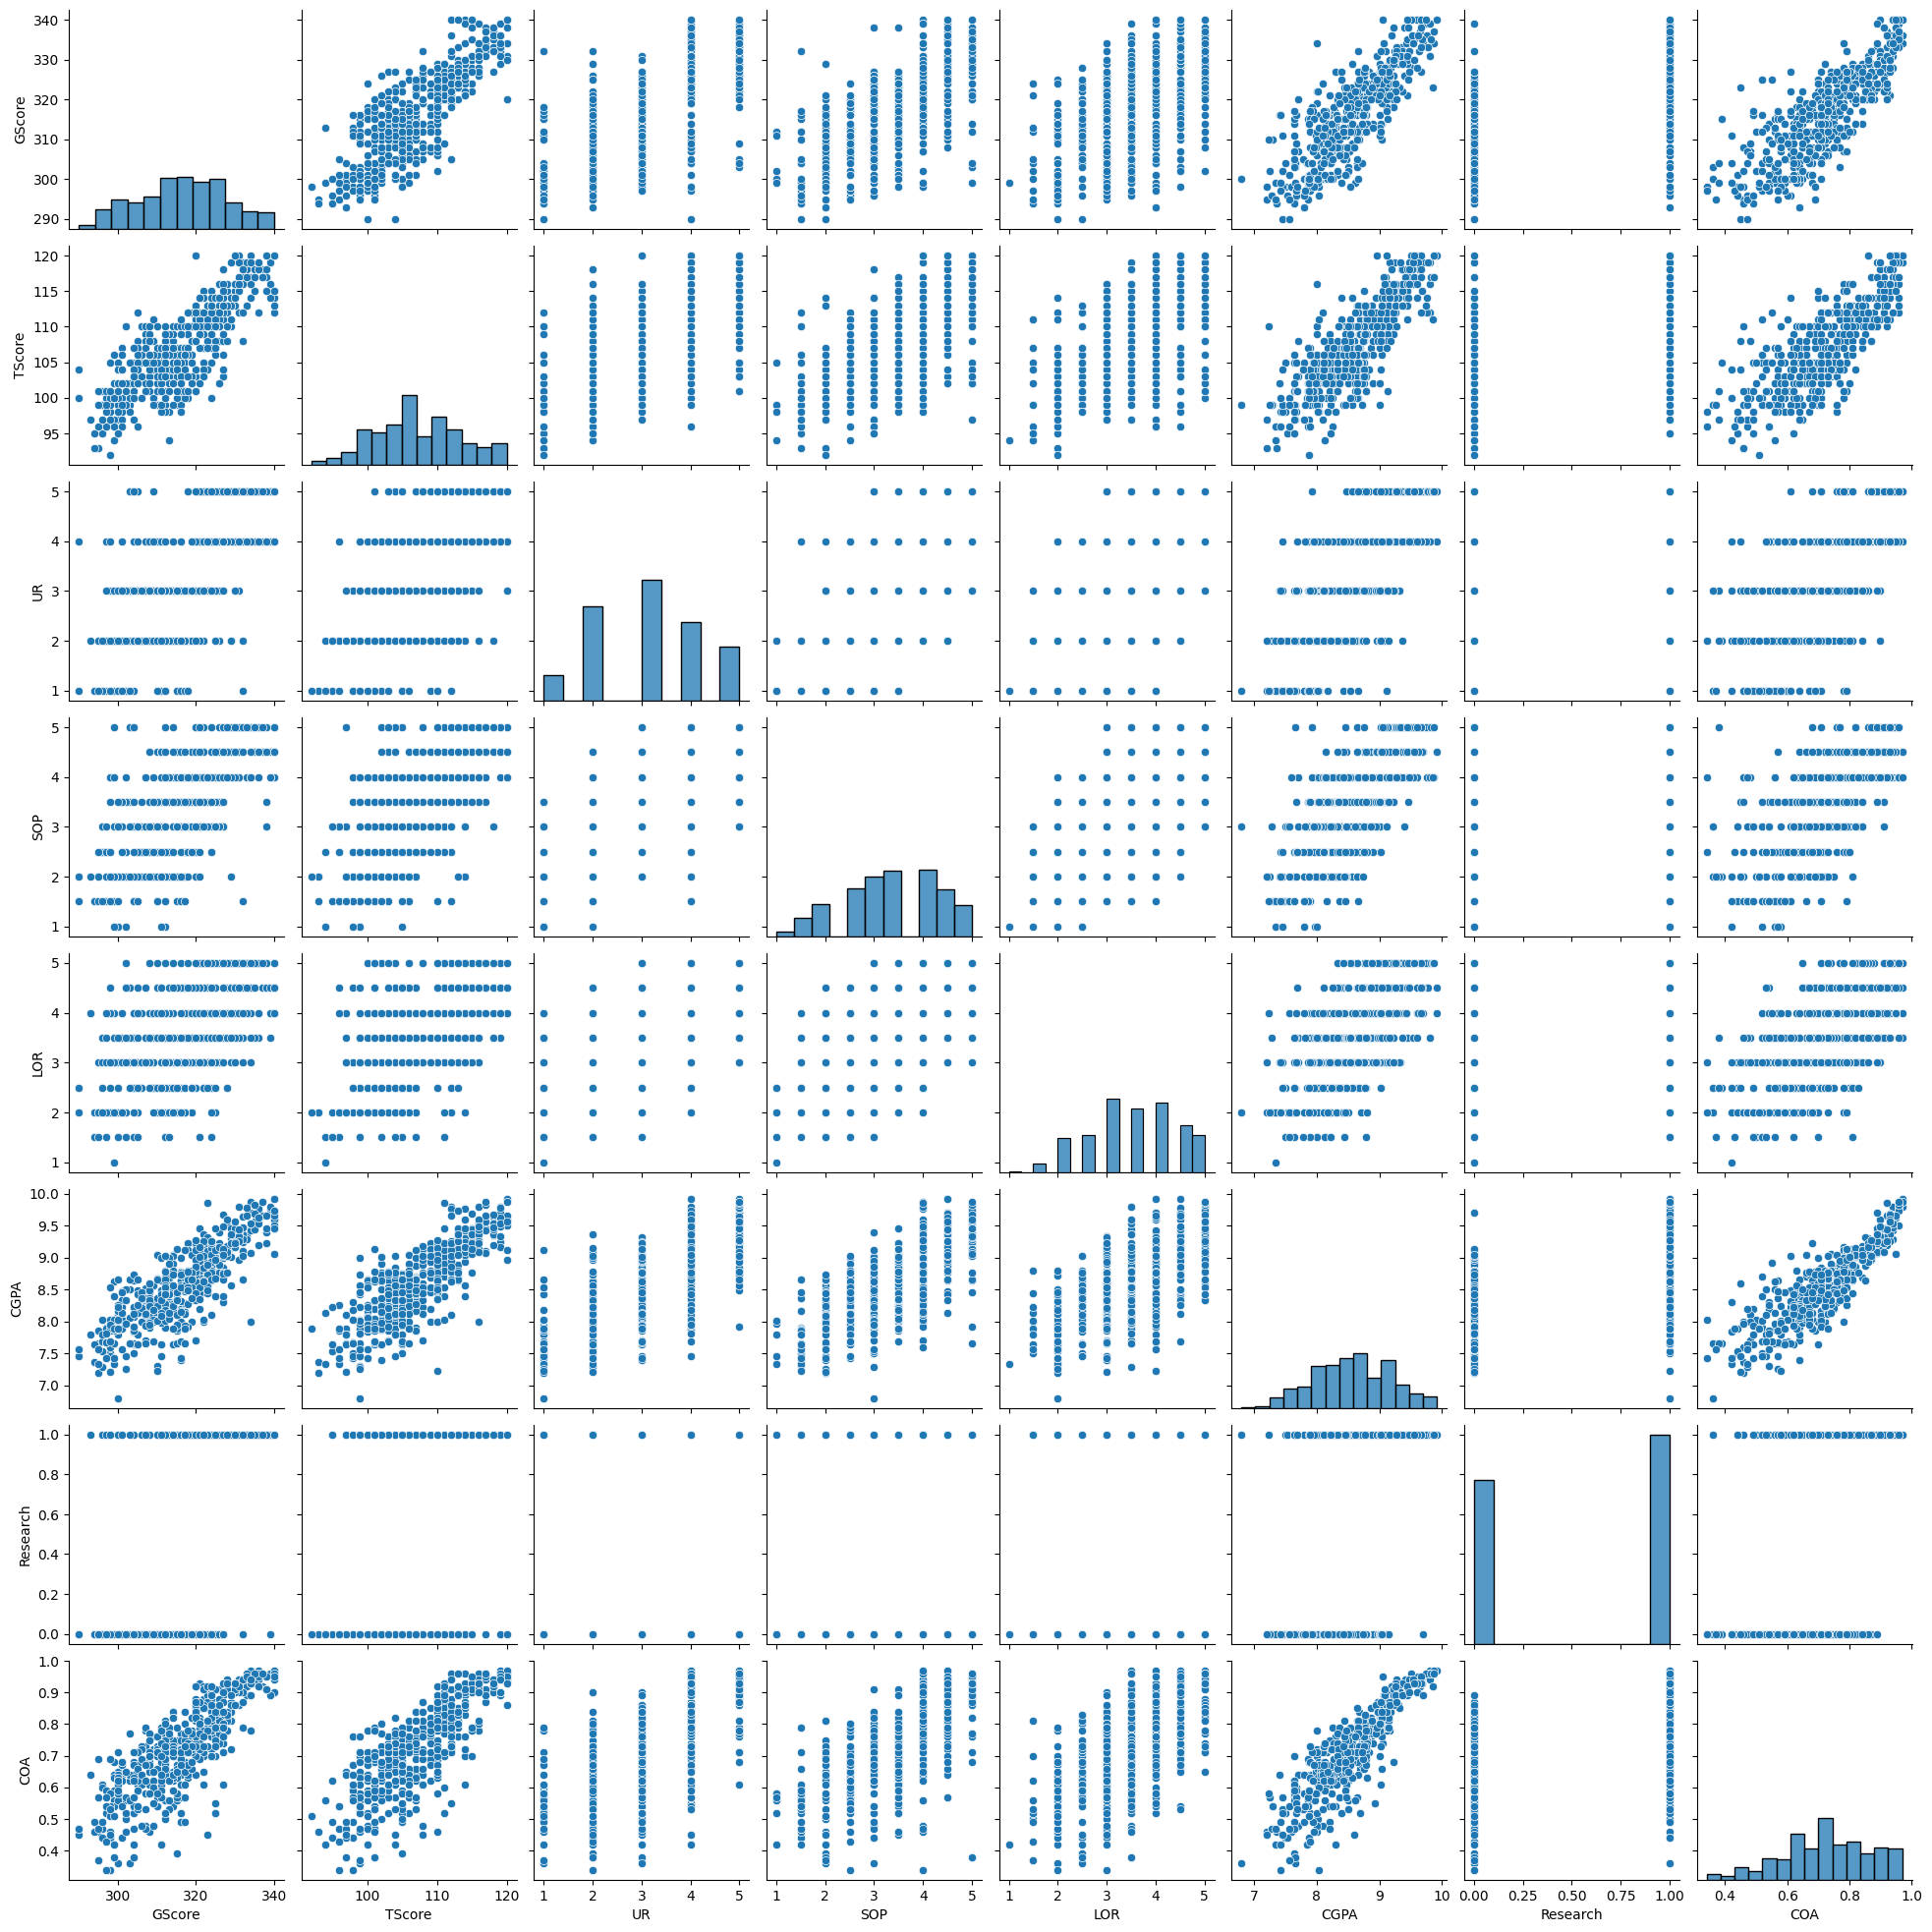

In [30]:
sns.pairplot(df)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X = np.asarray(df[['GScore', 'TScore', 'UR', 'SOP', 'LOR', 'CGPA', 'Research']])
y = np.asarray(df['COA'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.35)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(325, 7) (325,)
(175, 7) (175,)


In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
pf = PolynomialFeatures(degree=1)
X_train_pf = pf.fit_transform(X_train)

In [56]:
lr_pf = LinearRegression(fit_intercept=False)
lr_pf.fit(X_train_pf, y_train)

LinearRegression(fit_intercept=False)

In [57]:
y_pred = lr_pf.predict(PolynomialFeatures(degree=1).fit_transform(X_test))

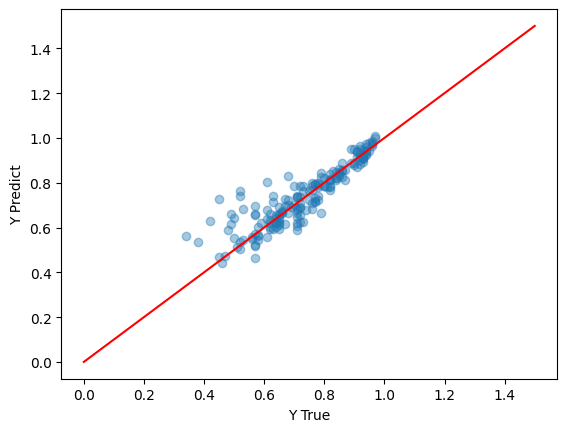

In [58]:
plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 1.5, 100), 
         np.linspace(0, 1.5, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

In [59]:
from sklearn.pipeline import Pipeline

In [69]:
steps = [('poly_feature', PolynomialFeatures(degree=1)),
         ('lr', LinearRegression(fit_intercept=False))]

model = Pipeline(steps=steps)

model.fit(X_train, y_train)

Pipeline(steps=[('poly_feature', PolynomialFeatures(degree=1)),
                ('lr', LinearRegression(fit_intercept=False))])

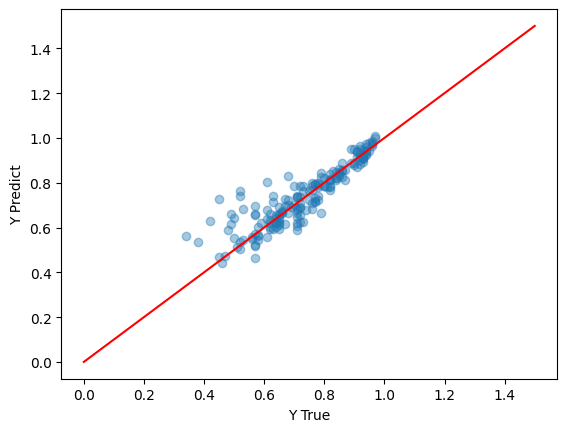

In [70]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 1.5, 100), 
         np.linspace(0, 1.5, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');